In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
credit_card_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [176]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [177]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [178]:
credit_card_data.shape

(284807, 31)

In [179]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [180]:
credit_card_data.duplicated().sum()

1081

In [181]:
credit_card_data = credit_card_data.drop_duplicates()

In [182]:
credit_card_data.duplicated().sum()

0

# __Exploratory Data Analysis:__

In [183]:
#getting the number of legit and fraud transactions count based on the Class columns
credit_card_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [184]:
#separating the data into legit and fraud
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
print(f'Number of legit transactions are : {len(legit)} and are of {round(len(legit)/len(credit_card_data) * 100,3)} % of the dataset')
print(f'Number of fraud transactions are : {len(fraud)} and are of {round(len(fraud)/len(credit_card_data) * 100,3)} % of the dataset')

Number of legit transactions are : 283253 and are of 99.833 % of the dataset
Number of fraud transactions are : 473 and are of 0.167 % of the dataset


Text(0.5, 1.0, 'Class Distribution (Pie chart)')

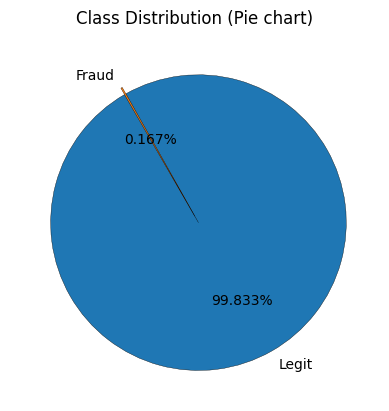

In [185]:
plt.pie(credit_card_data['Class'].value_counts(), labels=['Legit','Fraud'], autopct='%1.03f%%', startangle=120,explode = (0.05,0),
wedgeprops = {'edgecolor' : 'black','linewidth': 0.25,'antialiased' : True})
plt.title("Class Distribution (Pie chart)")

In [186]:
time_in_days = (credit_card_data['Time'].iloc[-1])/(60*60*24)
print(f'Number of days the transactions were taken: {round(time_in_days)} days')

Number of days the transactions were taken: 2 days


In [187]:
# Calculate Q1 and Q3 for each column
Q1 = credit_card_data.quantile(0.25)
Q3 = credit_card_data.quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Identify outliers based on IQR
outliers_iqr = (credit_card_data < (Q1 - 1.5 * IQR)) | (credit_card_data > (Q3 + 1.5 * IQR))

print(outliers_iqr.sum())

Time          0
V1         6948
V2        13390
V3         3306
V4        11094
V5        12221
V6        22886
V7         8839
V8        23904
V9         8199
V10        9345
V11         735
V12       15282
V13        3362
V14       14060
V15        2884
V16        8180
V17        7353
V18        7468
V19       10150
V20       27553
V21       14401
V22        1298
V23       18467
V24        4758
V25        5333
V26        5665
V27       38799
V28       30094
Amount    31685
Class       473
dtype: int64


```
```
# __Imbalanced Data:__
```
Feeding Unbalanced data to the model will result in :

1. Biased Model
2. Overfitting
3. Misleading Accuracy

As the data is highly imbalanced we try to have a dataframe of equal number of legit and fraud transactions. This sampling is called under-sampling.
```

In [188]:
legit_sample = legit.sample(n=len(fraud))

In [189]:
legit_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
166872,118358.0,2.174008,-0.714694,-1.615368,-1.015472,-0.026210,0.303308,-1.053798,0.139120,-0.192908,...,0.225884,0.706152,0.004106,-0.447097,-0.025364,-0.073303,0.024860,-0.025065,16.42,0
143017,85069.0,-0.872164,1.481691,0.957481,2.679663,0.024672,0.197610,0.848322,0.435733,-2.284891,...,0.162702,0.094506,-0.141232,-0.023842,0.469560,0.359177,-0.120230,0.003611,96.62,0
166598,118191.0,-3.369012,-1.926767,-0.891016,2.232647,3.888829,1.118960,2.532638,-0.073344,-2.265690,...,0.174665,1.278189,1.840715,-0.989970,1.432719,0.336720,0.133096,-0.434893,302.65,0
23259,32660.0,-0.643487,1.079425,1.600068,-0.289322,0.271640,-0.017738,0.857382,-0.052408,-0.459677,...,-0.221962,-0.291361,-0.028198,0.019320,-0.238619,0.057235,0.234010,-0.057599,22.88,0
158902,111944.0,-1.246311,-0.078872,-0.770127,1.355205,2.296024,-0.751235,1.666298,-0.522497,-0.587710,...,-0.089600,0.449983,0.787015,0.287037,0.414230,-0.374439,0.094307,-0.163334,86.07,0


In [190]:
main_data = pd.concat([legit_sample,fraud],axis=0)

In [191]:
print(main_data.shape)

(946, 31)


In [192]:
print('Legit transactions are', round(len(legit_sample)/len(main_data) * 100,3), '% of the dataset')
print('Fraud transactions are', round(len(fraud)/len(main_data) * 100,3), '% of the dataset')

Legit transactions are 50.0 % of the dataset
Fraud transactions are 50.0 % of the dataset


([<matplotlib.patches.Wedge at 0x7d4d6e0df0a0>,
 [Text(-0.7392057511395205, -0.8809511095868247, 'legit'),
  Text(0.7070663706551936, 0.8426488874308756, 'fraud')],
 [Text(-0.4178119462962506, -0.49792888802733565, '50.0%'),
  Text(0.3856725658119237, 0.4596266658713867, '50.0%')])

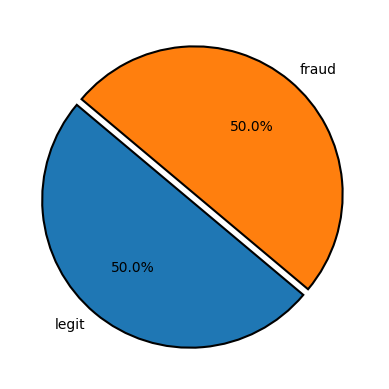

In [193]:
plt.pie(main_data['Class'].value_counts(), labels=['legit','fraud'], autopct='%1.1f%%',startangle=140,explode = (0.05,0),
wedgeprops = {'edgecolor' : 'black','linewidth': 1.5,'antialiased' : True})

In [194]:
act_0 = credit_card_data[credit_card_data['Class']==0]['Amount'].describe()
act_1 = credit_card_data[credit_card_data['Class']==1]['Amount'].describe()
samp_0 = main_data[main_data['Class']==0]['Amount'].describe()
samp_1 = main_data[main_data['Class']==1]['Amount'].describe()
result = pd.concat([act_0, samp_0, act_1, samp_1], axis=1)
result.columns = ['Act 0','Samp 0','Act 1', 'Samp 1']
print(result)

               Act 0       Samp 0        Act 1       Samp 1
count  283253.000000   473.000000   473.000000   473.000000
mean       88.413575    72.716554   123.871860   123.871860
std       250.379023   148.242390   260.211041   260.211041
min         0.000000     0.000000     0.000000     0.000000
25%         5.670000     5.000000     1.000000     1.000000
50%        22.000000    20.000000     9.820000     9.820000
75%        77.460000    79.000000   105.890000   105.890000
max     25691.160000  1296.000000  2125.870000  2125.870000




```
```
# Splitting the data into Features and Targets
```
```


In [195]:
X = main_data.drop(columns = 'Class',axis =1)
Y = main_data['Class']

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

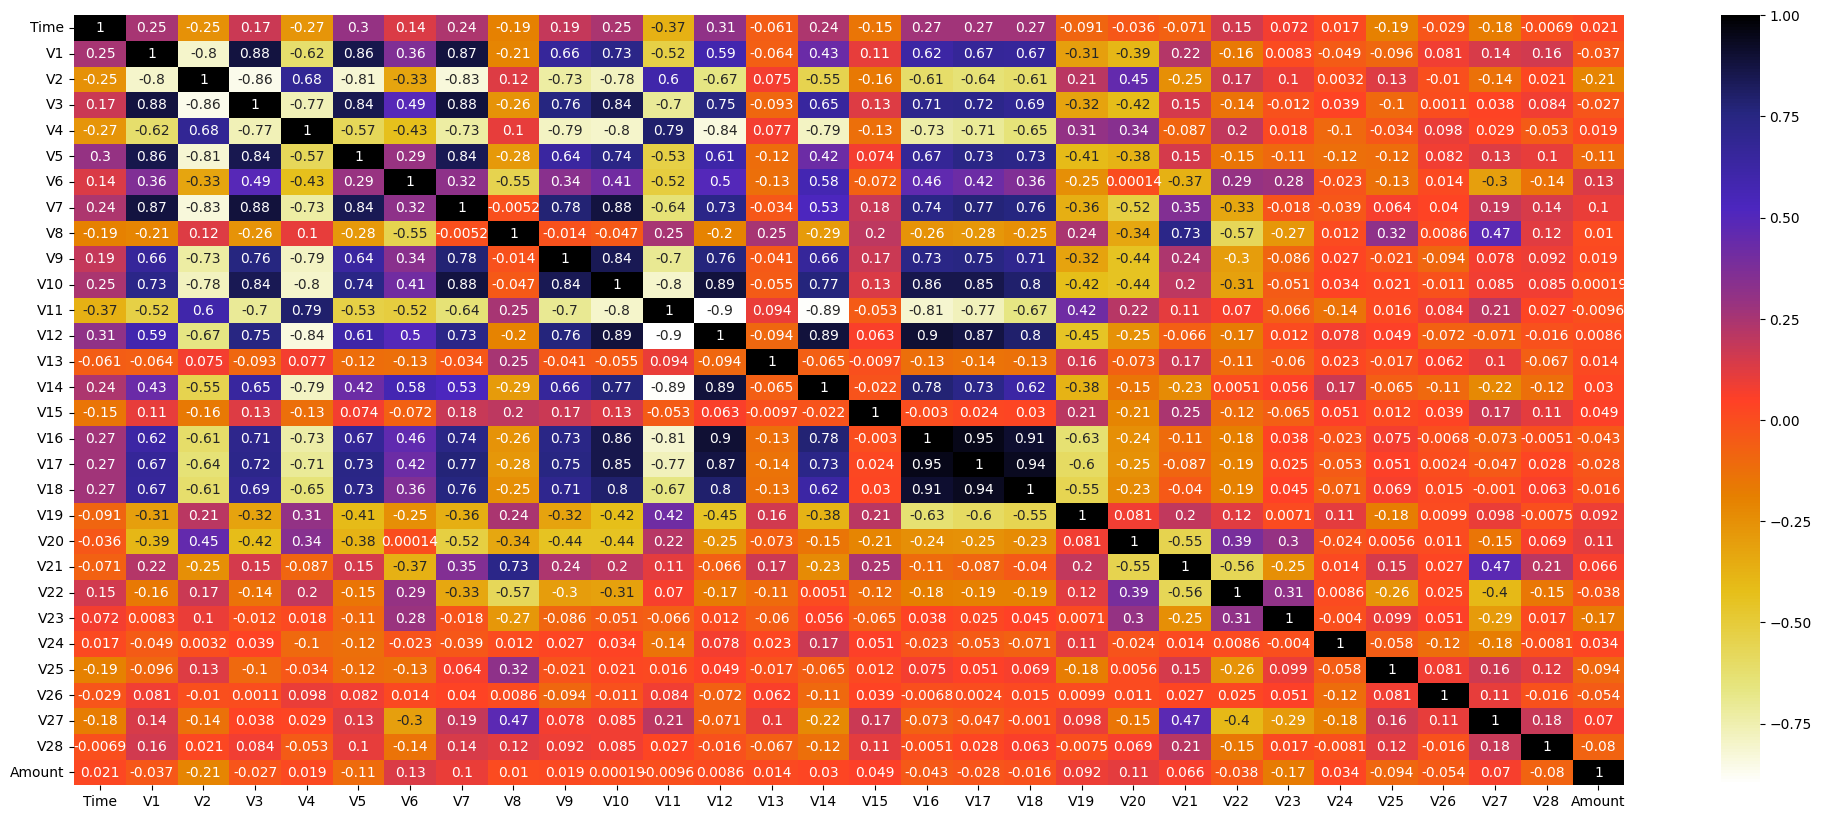

In [198]:
import seaborn as sns
plt.figure(figsize=(25,10))
corr= X_train.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [199]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [200]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

10

In [201]:
corr_features

{'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V3', 'V5', 'V7'}

In [202]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)
# X=X.drop(corr_features,axis=1)

In [203]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(946, 30)
(756, 20)
(190, 20)


In [213]:
# Calculate Q1 and Q3 for each column
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Identify outliers based on IQR
outliers_iqr = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

print(outliers_iqr.sum())

Time        0
V1         84
V2         81
V3         75
V4         17
V5        126
V6         74
V7        115
V8        160
V9         46
V10        77
V11        22
V12        38
V13         8
V14         8
V15        18
V16        59
V17        81
V18        82
V19        44
V20       112
V21       107
V22        18
V23       124
V24        10
V25        55
V26         6
V27       152
V28       124
Amount     99
dtype: int64


In [204]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import svm

In [205]:
pre_processor = ColumnTransformer([
    ('scaler', RobustScaler(), slice(0, 30))
])

# Creating the pipelines with feature scaling and classifier

pipeline_lr = Pipeline([
    ('preprocessor', pre_processor),
    ('classifier', LogisticRegression())
])

pipeline_svm = Pipeline([
    ('preprocessor', pre_processor),
    ('classifier', svm.SVC(kernel='linear'))
])

pipeline_random = Pipeline([
    ('preprocessor', pre_processor),
    ('classifier', RandomForestClassifier(n_estimators=250,random_state=42,max_features=20))
])

In [206]:
pipeline_lr.fit(X_train, Y_train)
pipeline_svm.fit(X_train, Y_train)
pipeline_random.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  slice(0, 30, None))])),
                ('classifier',
                 RandomForestClassifier(max_features=20, n_estimators=250,
                                        random_state=42))])

In [207]:
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_svm = pipeline_svm.predict(X_test)
y_pred_random = pipeline_random.predict(X_test)

In [208]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for Logistic Regression
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
precision_lr = precision_score(Y_test, y_pred_lr)
recall_lr = recall_score(Y_test, y_pred_lr)
f1_lr = f1_score(Y_test, y_pred_lr)

# Calculate precision, recall, and F1-score for SVM
accuracy_svm= accuracy_score(Y_test, y_pred_svm)
precision_svm = precision_score(Y_test, y_pred_svm)
recall_svm = recall_score(Y_test, y_pred_svm)
f1_svm = f1_score(Y_test, y_pred_svm)

# Calculate precision, recall, and F1-score for Random Forest Classifier
accuracy_rf= accuracy_score(Y_test, y_pred_random)
precision_rf = precision_score(Y_test, y_pred_random)
recall_rf = recall_score(Y_test, y_pred_random)
f1_rf = f1_score(Y_test, y_pred_random)

print("-" * 72)
print("| {:<15} | {:<20} | {:<12} | {:<12}|".format("Metric", "Logistic Regression", "SVM", "Random Forest"))
print("-" * 72)
print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} |".format("Accuracy", accuracy_lr, accuracy_svm, accuracy_rf))
print("-" * 72)
print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} |".format("Precision", precision_lr, precision_svm, precision_rf))
print("-" * 72)
print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} |".format("Recall", recall_lr, recall_svm, recall_rf))
print("-" * 72)
print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} |".format("F1-score", f1_lr, f1_svm, f1_rf))
print("-" * 72)

------------------------------------------------------------------------
| Metric          | Logistic Regression  | SVM          | Random Forest|
------------------------------------------------------------------------
| Accuracy        | 0.9053               | 0.8947       | 0.9105       |
------------------------------------------------------------------------
| Precision       | 0.9231               | 0.9032       | 0.9643       |
------------------------------------------------------------------------
| Recall          | 0.8842               | 0.8842       | 0.8526       |
------------------------------------------------------------------------
| F1-score        | 0.9032               | 0.8936       | 0.9050       |
------------------------------------------------------------------------


In [209]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(ax,y_true, y_pred, title):

    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix for {title}:")
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix for {title}')
    return cm


Confusion Matrix for Logistic Regression:
[[88  7]
 [11 84]]

Confusion Matrix for SVM:
[[86  9]
 [11 84]]

Confusion Matrix for Random Forest Classifier:
[[92  3]
 [14 81]]


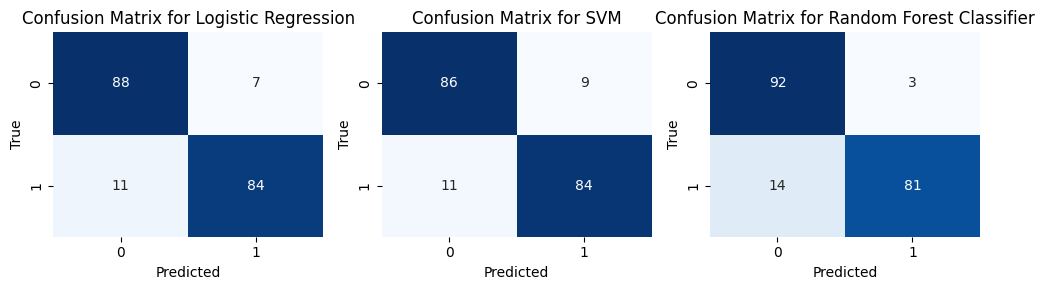

In [210]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
cm_lr = plot_confusion_matrix(axs[0],Y_test, y_pred_lr, "Logistic Regression")
cm_svm = plot_confusion_matrix(axs[1],Y_test, y_pred_svm, "SVM")
cm_rf = plot_confusion_matrix(axs[2],Y_test, y_pred_random, "Random Forest Classifier")
plt.tight_layout()
plt.show()

In [211]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy','precision','recall','f1']
scores = cross_validate(pipeline_lr,X, Y,scoring=scoring,cv=10)
scores_svm = cross_validate(pipeline_svm,X, Y,scoring=scoring,cv=10)
scores_random = cross_validate(pipeline_random,X, Y,scoring=scoring,cv=10)

In [212]:
print("-" * 64)
print("| {:<15} | {:<12} | {:<12} | {:<12}|".format("Metric", "Logistic", "SVM", "Random Forest"))
print("-" * 64)
for i in scoring:
    strng = 'test_' + i
    logistic_mean = scores[strng].mean()
    svm_mean = scores_svm[strng].mean()
    random_mean = scores_random[strng].mean()
    print("| {:<15} | {:<12.4f} | {:<12.4f} | {:<12.4f} |".format(i.capitalize(), logistic_mean, svm_mean, random_mean))
    print("-" * 62)

----------------------------------------------------------------
| Metric          | Logistic     | SVM          | Random Forest|
----------------------------------------------------------------
| Accuracy        | 0.9324       | 0.9229       | 0.9334       |
--------------------------------------------------------------
| Precision       | 0.9697       | 0.9735       | 0.9496       |
--------------------------------------------------------------
| Recall          | 0.8947       | 0.8713       | 0.9179       |
--------------------------------------------------------------
| F1              | 0.9285       | 0.9164       | 0.9314       |
--------------------------------------------------------------
